First things first, we import pandas and then we read the necessary data from the replication package.

In [1]:
import pandas as pd
df = pd.read_csv('data/county_outcomes_simple.csv')

In [2]:
df

,state,county,cz,czname,kfr_pooled_pooled_p25,kfr_pooled_pooled_p25_se,jail_pooled_pooled_p25,jail_pooled_pooled_p25_se,pooled_pooled_count,kfr_black_pooled_p25,...,jail_hisp_male_p25,jail_hisp_male_p25_se,jail_white_male_p25,jail_white_male_p25_se,white_male_count,black_male_count,hisp_male_count,white_female_count,black_female_count,hisp_female_count
0,1,1,11101.0,Montgomery,0.361666,0.005026,0.030568,0.004108,5922.3921,0.307032,...,0.057968,0.057395,0.025038,0.006608,1874.46810,989.14886,50.308254,1739.24780,989.096620,54.077316
1,1,3,11001.0,Mobile,0.388847,0.003599,0.022593,0.002463,15458.3960,0.301880,...,0.054038,0.034066,0.029861,0.004701,5544.37500,1964.96840,218.435900,5226.07810,1916.269400,210.060300
2,1,5,10301.0,Eufaula,0.349386,0.005937,0.033516,0.005712,4863.9736,0.308615,...,NaN,NaN,0.009500,0.006570,729.84253,1787.36910,NaN,629.64722,1806.091700,NaN
3,1,7,10801.0,Tuscaloosa,0.363391,0.008233,0.031667,0.007499,3061.4934,0.309438,...,NaN,NaN,0.038612,0.013741,983.28558,613.93317,NaN,941.44788,565.889710,NaN
4,1,9,10700.0,Birmingham,0.391879,0.005882,0.020528,0.003750,6740.9116,0.310179,...,0.037591,0.027402,0.034564,0.007016,2946.53000,71.30426,442.633730,2779.32890,64.377319,411.615330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,72,145,NaN,NaN,0.252577,0.028445,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3215,72,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3216,72,149,NaN,NaN,0.212865,0.028881,0.006759,0.039919,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,72,151,NaN,NaN,0.256017,0.021645,0.017516,0.027270,NaN,NaN,...,0.025344,0.036674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see that the dataset does not have a column with the county codes.

So, we need to create them.

After some research online, we see that the first 2 digits of the 5-digit county code indicate the state of the county. The rest indicate the code of the county within the state.

So, we have to add a 0 in front of the states that have only one digit. 

That's why we create a simple function.

In [3]:
def fixStateCode(x):
    if(len(x) == 1):
        return '0'+x
    else:
        return x

In [4]:
df['state']=df['state'].astype("string")

In [5]:
df['state'] = df['state'].apply(fixStateCode)

We do the same for the county column.

In [6]:
def fixCountyCode(x):
    return ((3-len(x))*'0')+x


In [7]:
df['county']=df['county'].astype("string")

In [8]:
df['county'] = df['county'].apply(fixCountyCode)

Combining the two columns, we create the 5-digit county code.

In [9]:
def createCountyCode():
    return df[['state']] + df[["county"]]

In [10]:
df["county_code"] = df['state'].astype(str) + df["county"]


In [11]:
df.insert(0, 'county_code', df.pop('county_code'))


So, the dataset looks like this:

In [12]:
df

,county_code,state,county,cz,czname,kfr_pooled_pooled_p25,kfr_pooled_pooled_p25_se,jail_pooled_pooled_p25,jail_pooled_pooled_p25_se,pooled_pooled_count,...,jail_hisp_male_p25,jail_hisp_male_p25_se,jail_white_male_p25,jail_white_male_p25_se,white_male_count,black_male_count,hisp_male_count,white_female_count,black_female_count,hisp_female_count
0,01001,01,001,11101.0,Montgomery,0.361666,0.005026,0.030568,0.004108,5922.3921,...,0.057968,0.057395,0.025038,0.006608,1874.46810,989.14886,50.308254,1739.24780,989.096620,54.077316
1,01003,01,003,11001.0,Mobile,0.388847,0.003599,0.022593,0.002463,15458.3960,...,0.054038,0.034066,0.029861,0.004701,5544.37500,1964.96840,218.435900,5226.07810,1916.269400,210.060300
2,01005,01,005,10301.0,Eufaula,0.349386,0.005937,0.033516,0.005712,4863.9736,...,NaN,NaN,0.009500,0.006570,729.84253,1787.36910,NaN,629.64722,1806.091700,NaN
3,01007,01,007,10801.0,Tuscaloosa,0.363391,0.008233,0.031667,0.007499,3061.4934,...,NaN,NaN,0.038612,0.013741,983.28558,613.93317,NaN,941.44788,565.889710,NaN
4,01009,01,009,10700.0,Birmingham,0.391879,0.005882,0.020528,0.003750,6740.9116,...,0.037591,0.027402,0.034564,0.007016,2946.53000,71.30426,442.633730,2779.32890,64.377319,411.615330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,72145,72,145,NaN,NaN,0.252577,0.028445,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3215,72147,72,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3216,72149,72,149,NaN,NaN,0.212865,0.028881,0.006759,0.039919,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,72151,72,151,NaN,NaN,0.256017,0.021645,0.017516,0.027270,NaN,...,0.025344,0.036674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we have to read another dataset; the one that contains the population of each county.

In [13]:
counties = pd.read_csv('data/social_capital_county.csv')

We sort the dataset based on the population and take the 200 most populated counties of it.

In [14]:
counties.sort_values('pop2018', ascending = False,inplace =True)

In [15]:
counties_200 = counties[:200]

In [16]:
counties_200 = counties_200[['county','county_name','pop2018','ec_county']]

Now, the dataset looks like this:

In [17]:
counties_200

,county,county_name,pop2018,ec_county
203,6037,"Los Angeles, California",10098052.0,0.73580
605,17031,"Cook, Illinois",5223719.0,0.75869
2598,48201,"Harris, Texas",4602523.0,0.67668
102,4013,"Maricopa, Arizona",4253913.0,0.74400
221,6073,"San Diego, California",3302833.0,0.90846
...,...,...,...,...
2517,48039,"Brazoria, Texas",353999.0,0.83867
357,12083,"Marion, Florida",348371.0,0.62977
1310,27003,"Anoka, Minnesota",347431.0,1.03045
2512,48027,"Bell, Texas",342236.0,0.77036


We need to fix the county code for this dataset as well.

In [18]:
def fixCountyCodesThatStartWithZero(x):
    if(len(x) == 4):
        return '0'+x
    else:
        return x

In [19]:
counties_200['county'] = counties_200['county'].apply(str)

counties_200['county'] = counties_200['county'].apply(fixCountyCodesThatStartWithZero)

In [20]:
counties_200

,county,county_name,pop2018,ec_county
203,06037,"Los Angeles, California",10098052.0,0.73580
605,17031,"Cook, Illinois",5223719.0,0.75869
2598,48201,"Harris, Texas",4602523.0,0.67668
102,04013,"Maricopa, Arizona",4253913.0,0.74400
221,06073,"San Diego, California",3302833.0,0.90846
...,...,...,...,...
2517,48039,"Brazoria, Texas",353999.0,0.83867
357,12083,"Marion, Florida",348371.0,0.62977
1310,27003,"Anoka, Minnesota",347431.0,1.03045
2512,48027,"Bell, Texas",342236.0,0.77036


We need to merge the two datasets in order to keep the kfr_pooled_pooled_p25 and the population of each county.

Before doing that, we need to rename the columns of the df dataframe, since the merge is going to be on the county code.

In [21]:
df.rename(columns={'county': 'county_code', 'county_code': 'county'}, inplace=True)


In [22]:
df

,county,state,county_code,cz,czname,kfr_pooled_pooled_p25,kfr_pooled_pooled_p25_se,jail_pooled_pooled_p25,jail_pooled_pooled_p25_se,pooled_pooled_count,...,jail_hisp_male_p25,jail_hisp_male_p25_se,jail_white_male_p25,jail_white_male_p25_se,white_male_count,black_male_count,hisp_male_count,white_female_count,black_female_count,hisp_female_count
0,01001,01,001,11101.0,Montgomery,0.361666,0.005026,0.030568,0.004108,5922.3921,...,0.057968,0.057395,0.025038,0.006608,1874.46810,989.14886,50.308254,1739.24780,989.096620,54.077316
1,01003,01,003,11001.0,Mobile,0.388847,0.003599,0.022593,0.002463,15458.3960,...,0.054038,0.034066,0.029861,0.004701,5544.37500,1964.96840,218.435900,5226.07810,1916.269400,210.060300
2,01005,01,005,10301.0,Eufaula,0.349386,0.005937,0.033516,0.005712,4863.9736,...,NaN,NaN,0.009500,0.006570,729.84253,1787.36910,NaN,629.64722,1806.091700,NaN
3,01007,01,007,10801.0,Tuscaloosa,0.363391,0.008233,0.031667,0.007499,3061.4934,...,NaN,NaN,0.038612,0.013741,983.28558,613.93317,NaN,941.44788,565.889710,NaN
4,01009,01,009,10700.0,Birmingham,0.391879,0.005882,0.020528,0.003750,6740.9116,...,0.037591,0.027402,0.034564,0.007016,2946.53000,71.30426,442.633730,2779.32890,64.377319,411.615330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,72145,72,145,NaN,NaN,0.252577,0.028445,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3215,72147,72,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3216,72149,72,149,NaN,NaN,0.212865,0.028881,0.006759,0.039919,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,72151,72,151,NaN,NaN,0.256017,0.021645,0.017516,0.027270,NaN,...,0.025344,0.036674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
counties_200_merged = pd.merge(counties_200, df, on='county', how='inner')


In [24]:
counties_200_merged

,county,county_name,pop2018,ec_county,state,county_code,cz,czname,kfr_pooled_pooled_p25,kfr_pooled_pooled_p25_se,...,jail_hisp_male_p25,jail_hisp_male_p25_se,jail_white_male_p25,jail_white_male_p25_se,white_male_count,black_male_count,hisp_male_count,white_female_count,black_female_count,hisp_female_count
0,06037,"Los Angeles, California",10098052.0,0.73580,06,037,38300.0,Los Angeles,0.431230,0.000434,...,0.023462,0.000468,0.016260,0.000873,84526.6410,88638.71100,570803.88000,80560.1090,87336.51600,541644.3800
1,17031,"Cook, Illinois",5223719.0,0.75869,17,031,24300.0,Chicago,0.384614,0.000623,...,0.027395,0.001043,0.018332,0.001031,56970.9340,159762.61000,123532.02000,53792.4020,159016.58000,115661.8400
2,48201,"Harris, Texas",4602523.0,0.67668,48,201,32000.0,Houston,0.418473,0.000665,...,0.033130,0.001053,0.050716,0.002323,42244.8050,73547.78100,154363.47000,40700.9800,71957.83600,145810.9100
3,04013,"Maricopa, Arizona",4253913.0,0.74400,04,013,35001.0,Phoenix,0.398581,0.000842,...,0.059502,0.002116,0.034040,0.001395,69482.5390,12095.97900,100963.27000,65964.7110,11421.01400,95261.9060
4,06073,"San Diego, California",3302833.0,0.90846,06,073,38000.0,San Diego,0.425785,0.000865,...,0.024419,0.001109,0.019960,0.001213,44391.9530,15350.64400,96530.24200,42592.1170,14714.93900,92251.9920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,48039,"Brazoria, Texas",353999.0,0.83867,48,039,31900.0,Pearland,0.451939,0.002904,...,0.033313,0.004045,0.045578,0.005395,5704.7661,1572.02090,6076.70560,5489.9922,1512.64060,5833.6670
196,12083,"Marion, Florida",348371.0,0.62977,12,083,7800.0,Ocala,0.374836,0.002182,...,0.027289,0.006275,0.041493,0.003792,11033.9720,4243.57710,1944.12790,10433.6550,4001.54100,1725.4939
197,27003,"Anoka, Minnesota",347431.0,1.03045,27,003,21501.0,Minneapolis,0.457203,0.003341,...,0.021003,0.008483,0.022855,0.002963,8655.4434,674.21936,362.89597,8041.9150,614.86072,429.5491
198,48027,"Bell, Texas",342236.0,0.77036,48,027,32900.0,Killeen,0.381505,0.002189,...,0.066978,0.007147,0.049823,0.006230,6887.2529,5982.32570,5334.05320,6545.5703,5910.24610,4918.4507


We keep the columns that are of interest.

In [25]:
counties_200_merged = counties_200_merged[['county','county_name','czname','pop2018','ec_county', 'kfr_pooled_pooled_p25']]

In [26]:
counties_200_merged

,county,county_name,czname,pop2018,ec_county,kfr_pooled_pooled_p25
0,06037,"Los Angeles, California",Los Angeles,10098052.0,0.73580,0.431230
1,17031,"Cook, Illinois",Chicago,5223719.0,0.75869,0.384614
2,48201,"Harris, Texas",Houston,4602523.0,0.67668,0.418473
3,04013,"Maricopa, Arizona",Phoenix,4253913.0,0.74400,0.398581
4,06073,"San Diego, California",San Diego,3302833.0,0.90846,0.425785
...,...,...,...,...,...,...
195,48039,"Brazoria, Texas",Pearland,353999.0,0.83867,0.451939
196,12083,"Marion, Florida",Ocala,348371.0,0.62977,0.374836
197,27003,"Anoka, Minnesota",Minneapolis,347431.0,1.03045,0.457203
198,48027,"Bell, Texas",Killeen,342236.0,0.77036,0.381505


We need to keep only the county name, so we split the column county_name and keep the part before the comma.

In [27]:
def splitCountyName(x):
    return x.split(',')[0]


In [28]:
counties_200_merged['county_name'] = counties_200_merged['county_name'].apply(splitCountyName)


C:\Users\mernick\AppData\Local\Temp\ipykernel_22696\25950791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counties_200_merged['county_name'] = counties_200_merged['county_name'].apply(splitCountyName)


The final form of the dataframe looks like this:

In [29]:
counties_200_merged

,county,county_name,czname,pop2018,ec_county,kfr_pooled_pooled_p25
0,06037,Los Angeles,Los Angeles,10098052.0,0.73580,0.431230
1,17031,Cook,Chicago,5223719.0,0.75869,0.384614
2,48201,Harris,Houston,4602523.0,0.67668,0.418473
3,04013,Maricopa,Phoenix,4253913.0,0.74400,0.398581
4,06073,San Diego,San Diego,3302833.0,0.90846,0.425785
...,...,...,...,...,...,...
195,48039,Brazoria,Pearland,353999.0,0.83867,0.451939
196,12083,Marion,Ocala,348371.0,0.62977,0.374836
197,27003,Anoka,Minneapolis,347431.0,1.03045,0.457203
198,48027,Bell,Killeen,342236.0,0.77036,0.381505


We will construct the variables for the cities that we'll annotate.

Each variable will contain a list, with a tuple of the 'coordinates' (ec_county,kfr_pooled_pooled_p25) and the text for the annotation. 

New York City:

In [30]:
ny = [(counties_200_merged.loc[counties_200_merged['county_name'].str.contains("New York"),'ec_county'].iloc[0],
       counties_200_merged.loc[counties_200_merged['county_name'].str.contains("New York"),'kfr_pooled_pooled_p25'].iloc[0]),
     'New York City']

In [31]:
ny

[(0.82734001, 0.41869253), 'New York City']

San Francisco

In [32]:
sf = [(counties_200_merged.loc[counties_200_merged['county_name'] == "San Francisco",'ec_county'].iloc[0],
       counties_200_merged.loc[counties_200_merged['county_name'] == "San Francisco",'kfr_pooled_pooled_p25'].iloc[0]),
      "San Francisco"]

In [33]:
sf

[(1.31244, 0.50388849), 'San Francisco']

Salt Lake City

In [34]:
slc = [(counties_200_merged.loc[counties_200_merged['county_name'] == "Salt Lake",'ec_county'].iloc[0],
        counties_200_merged.loc[counties_200_merged['county_name'] == "Salt Lake",'kfr_pooled_pooled_p25'].iloc[0]),
       "Salt Lake City"]

In [35]:
slc

[(0.96394998, 0.45413134), 'Salt Lake City']

Minneapolis

In [36]:
mi = [(counties_200_merged.loc[counties_200_merged['czname'].str.contains('Minneapolis'),'ec_county'].iloc[0],
      counties_200_merged.loc[counties_200_merged['czname'].str.contains('Minneapolis'),'kfr_pooled_pooled_p25'].iloc[0]),
       'Minneapolis']

In [37]:
mi

[(0.97632003, 0.42896372), 'Minneapolis']

Indianapolis

In [38]:
ind = [(counties_200_merged.loc[counties_200_merged['czname'].str.contains('Indianapolis'),'ec_county'].iloc[0],
      counties_200_merged.loc[counties_200_merged['czname'].str.contains('Indianapolis'),'kfr_pooled_pooled_p25'].iloc[0]),
       'Indianapolis']

In [39]:
ind

[(0.64282, 0.34407961), 'Indianapolis']

Now, we are ready to create the scatterplot.

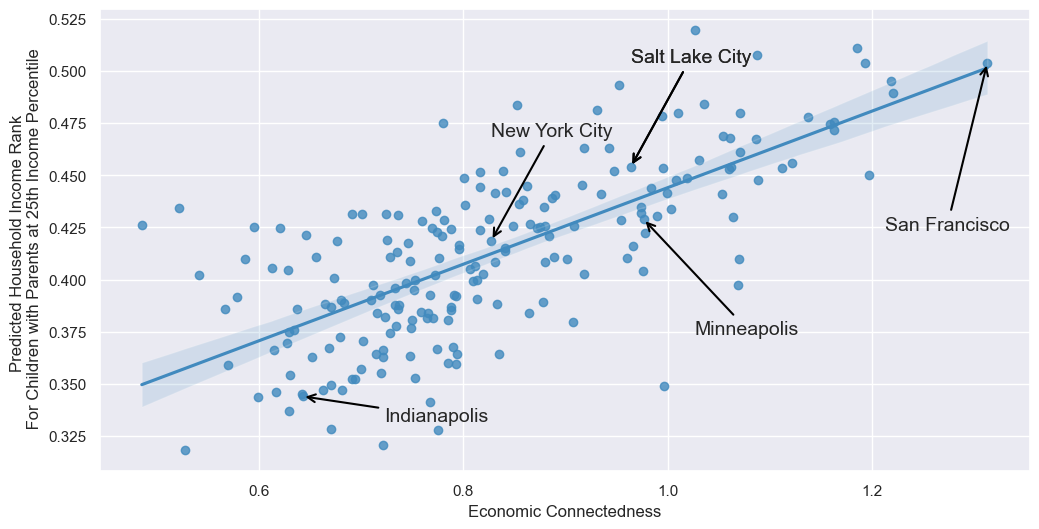

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style('dark')
sns.set(rc={'figure.figsize':(12, 6)})

plt.annotate(ny[1],
             ny[0],
             (ny[0][0],ny[0][1]+0.05),
             arrowprops= dict(arrowstyle='->', color='black',linewidth=1.5),
             size=14
            )

plt.annotate(sf[1],
             sf[0],
             (sf[0][0]-0.1,sf[0][1]-0.08),
             arrowprops= dict(arrowstyle='->', color='black',linewidth=1.5),
             size=14
            )

plt.annotate(slc[1],
             slc[0],
             (slc[0][0],slc[0][1]+0.05),
             arrowprops= dict(arrowstyle='->', color='black',linewidth=1.5),
             size=14
            )

plt.annotate(slc[1],
             slc[0],
             (slc[0][0],slc[0][1]+0.05),
             arrowprops= dict(arrowstyle='->', color='black',linewidth=1.5),
             size=14
            )

plt.annotate(mi[1],
             mi[0],
             (mi[0][0] + 0.05,mi[0][1]-0.055),
             arrowprops= dict(arrowstyle='->', color='black',linewidth=1.5),
             size=14
            )

plt.annotate(ind[1],
             ind[0],
             (ind[0][0]+0.08,ind[0][1]-0.012),
             arrowprops= dict(arrowstyle='->', color='black',linewidth=1.5),
             size=14
             
             
            )

_ = sns.regplot(x='ec_county', y='kfr_pooled_pooled_p25', data=counties_200_merged, ci=95,color="#418ABE")


plt.xlabel("Economic Connectedness")
plt.ylabel("Predicted Household Income Rank \n For Children with Parents at 25th Income Percentile")

plt.show()